In [39]:
# Importing libs

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    return s

In [41]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [42]:
GLOB_Y:pd.DataFrame
GLOB_X:pd.DataFrame

In [43]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [44]:
# Gradient descent optimize

# GD optimize

def gd_optimize(X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    X_trans = np.asarray(X).T
    Y_trans = np.asarray(Y).T

    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_trans.shape[0])
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_trans,Y_trans)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [45]:
# SGD optimize

def sgd_optimize(X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a stochastic gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    X_trans = np.asarray(X).T
    Y_trans = np.asarray(Y).T

    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_trans.shape[0])
    
    for i in range(num_iterations):
        # Prepare a random subsample of data
        sample_len = random.randint(100,200)
        X_sample = X.sample(sample_len)
        Y_sample = GLOB_Y[X_sample.index]
        X_trans = np.asarray(X_sample).T
        Y_trans = np.asarray(Y_sample).T
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_trans,Y_trans)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [46]:
# ADAM algorithm
beta_1 = 0.9
beta_2 = 0.999
epsilon = 0.00000001

def corr_val(value, coef, t):
    corr_val_x = value/(1-coef**t)
    return corr_val_x

def v_val_corr(value, t, grad_vec):
    v_val = beta_2*value + (1-beta_2) * np.power( grad_vec, 2)
    return v_val, corr_val(v_val, beta_2, t)

def s_val_corr(value, t, grad_vec):
    s_val = beta_1*value + (1-beta_1) * grad_vec
    return s_val, corr_val(s_val, beta_1, t)

def adam_optimize(X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a an ADAM descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []

    X_trans = np.asarray(X).T
    Y_trans = np.asarray(Y).T

    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_trans.shape[0])
    w_v_val, b_v_val = initialize_with_zeros(X_trans.shape[0])
    w_s_val, b_s_val = initialize_with_zeros(X_trans.shape[0])
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X_trans,Y_trans)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w_v_val, w_v_val_corr = v_val_corr(value=w_v_val, t=i+1, grad_vec=dw) # i+1 stands to avoid devision by zero
        b_v_val, b_v_val_corr = v_val_corr(value=b_v_val, t=i+1, grad_vec=db)

        w_s_val, w_s_val_corr = s_val_corr(value=w_s_val, t=i+1, grad_vec=dw) # i+1 stands to avoid devision by zero
        b_s_val, b_s_val_corr = s_val_corr(value=b_s_val, t=i+1, grad_vec=db)

        # update rule
        w -= learning_rate * w_s_val_corr / (np.sqrt(w_v_val_corr) + epsilon)
        b -= learning_rate * b_s_val_corr / (np.sqrt(b_v_val_corr) + epsilon)
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [47]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [48]:
# model

def model(X_train, Y_train, X_test, Y_test, optim_fun = gd_optimize, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    X_train_trans = np.asarray(X_train).T
    Y_train_trans = np.asarray(Y_train).T
    X_test_trans = np.asarray(X_test).T
    Y_test_trans = np.asarray(Y_test).T

    # Gradient descent
    parameters, grads, costs = optim_fun(X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test_trans)
    Y_prediction_train = predict(w, b, X_train_trans)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train_trans)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test_trans)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [49]:
# Prepare data
df = pd.read_csv("bioresponse.csv")
GLOB_Y=df['Activity'].values

# choosing numeric features
GLOB_X = df.drop(['Activity'], axis=1, inplace=False)
GLOB_X.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Create Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(GLOB_X,GLOB_Y,test_size=0.25, random_state=112233)

In [51]:
lerning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]

gd_res = []
sgd_res = []
adam_res = []

for i in range(len(lerning_rates)):
    print("Iteration ", i, ".")
    print("Learning rate:", lerning_rates[i])
    print("Gradient Descent:")
    gd_res.append(model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = lerning_rates[i], print_cost = False))
    print("Stochastic Gradient Descent:")
    sgd_res.append(model(X_train, y_train, X_test, y_test, optim_fun = sgd_optimize, num_iterations = 2000, learning_rate = lerning_rates[i], print_cost = False))
    print("ADAM:")
    adam_res.append(model(X_train, y_train, X_test, y_test, optim_fun = adam_optimize, num_iterations = 2000, learning_rate = lerning_rates[i], print_cost = False))
    print("\n")

Iteration  0 .
Learning rate: 0.0001
Gradient Descent:
train accuracy: 55.9900462140064 %
test accuracy: 56.18336886993603 %
Stochastic Gradient Descent:
train accuracy: 55.812300035549235 %
test accuracy: 56.28997867803838 %
ADAM:
train accuracy: 82.01208674013509 %
test accuracy: 76.65245202558636 %


Iteration  1 .
Learning rate: 0.0003
Gradient Descent:
train accuracy: 65.69498755776752 %
test accuracy: 65.13859275053305 %
Stochastic Gradient Descent:
train accuracy: 65.55279061500178 %
test accuracy: 65.2452025586354 %
ADAM:
train accuracy: 85.60255954496978 %
test accuracy: 77.29211087420043 %


Iteration  2 .
Learning rate: 0.001
Gradient Descent:
train accuracy: 72.7692854603626 %
test accuracy: 71.96162046908316 %
Stochastic Gradient Descent:
train accuracy: 72.62708851759687 %
test accuracy: 72.0682302771855 %
ADAM:
train accuracy: 89.7618201208674 %
test accuracy: 76.33262260127933 %


Iteration  3 .
Learning rate: 0.003
Gradient Descent:
train accuracy: 76.21756132243156 %


C:\Users\sorok\AppData\Local\Temp\ipykernel_17100\2989978550.py:24: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
C:\Users\sorok\AppData\Local\Temp\ipykernel_17100\2989978550.py:24: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 92.78350515463917 %
test accuracy: 75.47974413646055 %


Iteration  4 .
Learning rate: 0.01
Gradient Descent:
train accuracy: 78.74155705652328 %
test accuracy: 75.26652452025587 %
Stochastic Gradient Descent:
train accuracy: 78.77710629221471 %
test accuracy: 75.5863539445629 %
ADAM:
train accuracy: 94.09882687522219 %
test accuracy: 74.4136460554371 %


Iteration  5 .
Learning rate: 0.03
Gradient Descent:
train accuracy: 81.23000355492357 %
test accuracy: 76.86567164179104 %
Stochastic Gradient Descent:
train accuracy: 81.5854959118379 %
test accuracy: 76.97228144989339 %
ADAM:
train accuracy: 95.05865623889086 %
test accuracy: 74.20042643923242 %




'\nAs a result is can be seen that with increasing the learning rate graphs\nbecome more steep. While GD and SGD perform very close to each other,\nADAM converges a lot faster. But ADAM, as seen above, have train and test\naccuracy difference which means that overfit happened to some extent.\n'

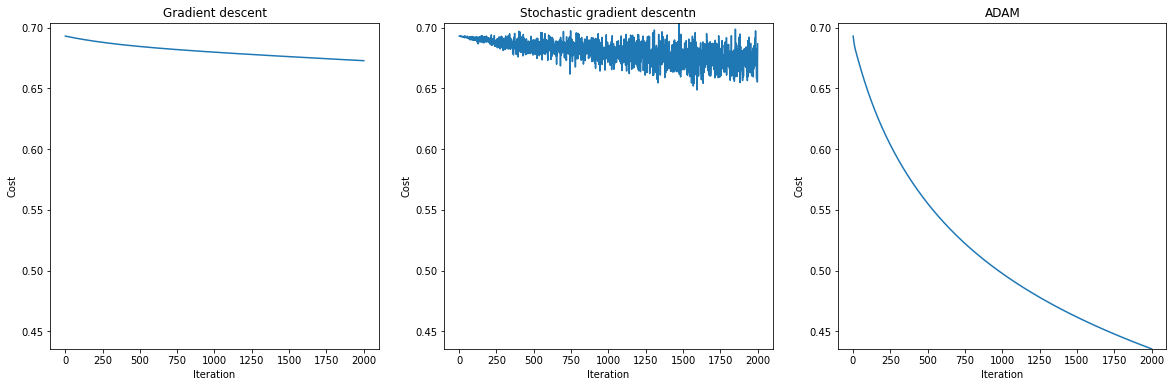

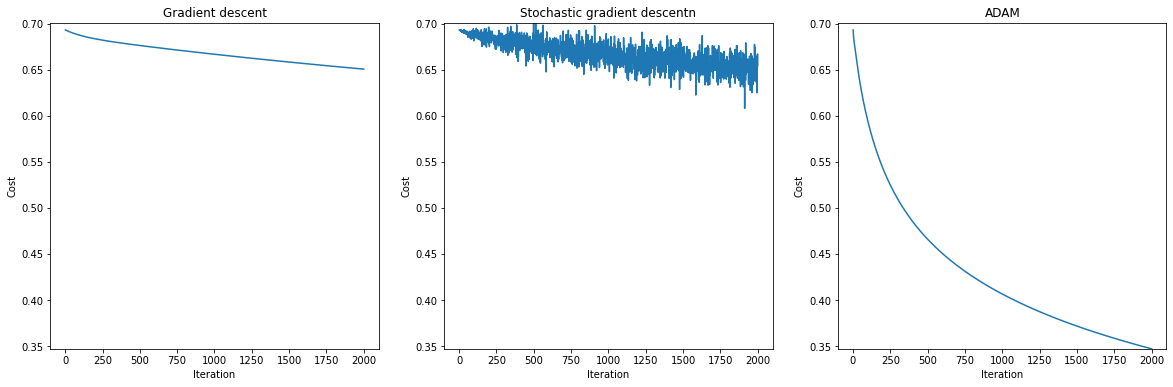

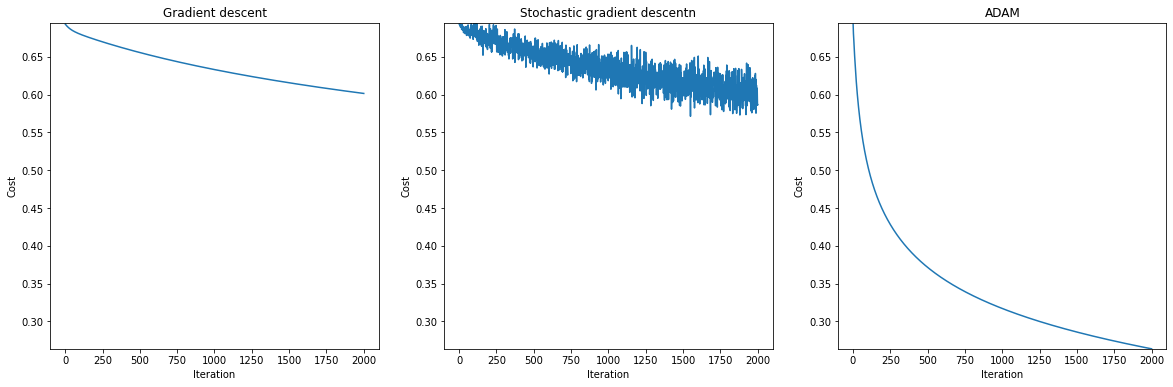

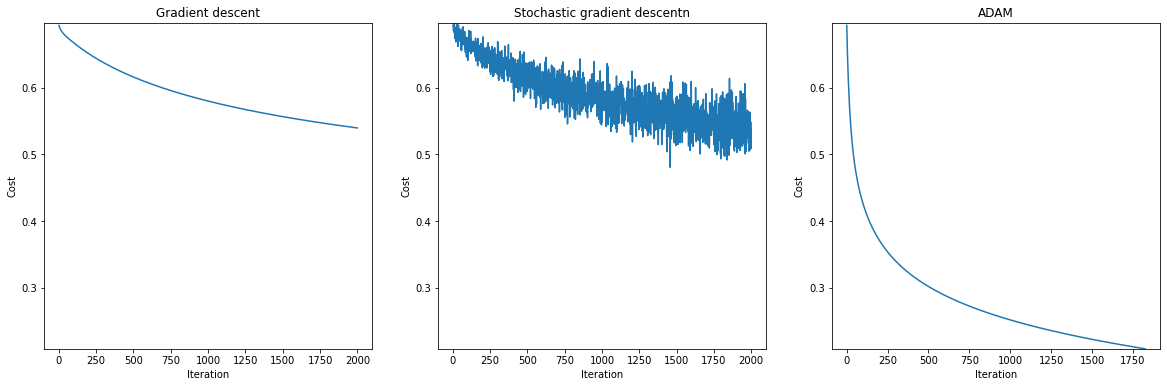

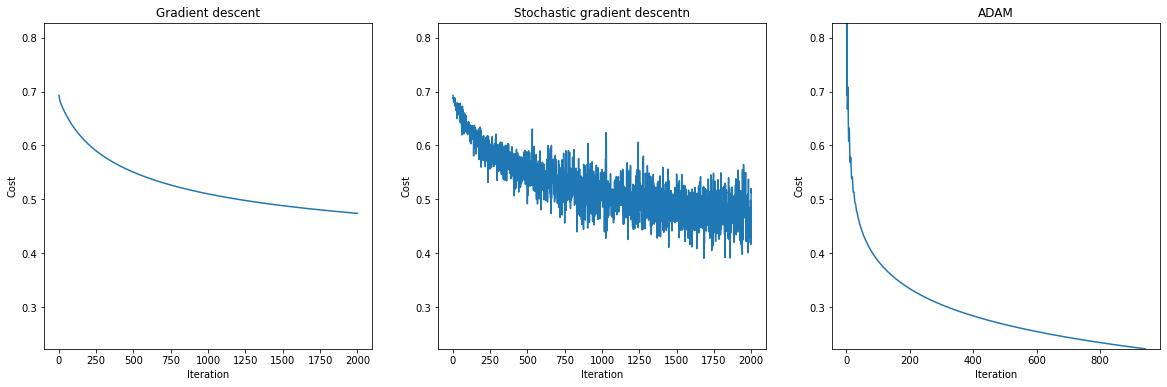

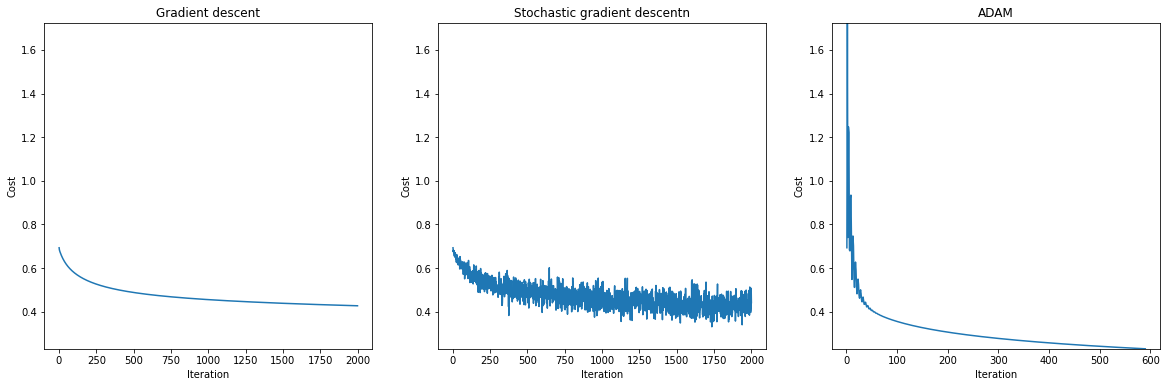

In [56]:
# Visualization

def print_plot_trio(costs_sgd, costs_gd, costs_adam, fig_num = 123):

    x_sgd = np.linspace(1, len(costs_sgd), len(costs_sgd))
    x_gd = np.linspace(1, len(costs_gd), len(costs_gd))
    x_adam = np.linspace(1, len(costs_adam), len(costs_adam))

    max_loss = max([max(costs_sgd), max(costs_gd), max(costs_adam)])
    min_loss = min([min(costs_sgd), min(costs_gd), min(costs_adam)])
    
    plt.figure(fig_num, figsize=(20, 6))

    plt.subplot(131)
    plt.plot(x_gd, costs_gd, )
    plt.ylim([min_loss, max_loss])
    plt.title("Gradient descent")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")       

    plt.subplot(132)
    plt.plot( x_sgd, costs_sgd)
    plt.ylim([min_loss, max_loss])
    plt.title("Stochastic gradient descentn")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

    plt.subplot(133)
    plt.plot( x_adam, costs_adam)
    plt.ylim([min_loss, max_loss])
    plt.title("ADAM")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    
for i in range(len(lerning_rates)):
    print_plot_trio(costs_gd = gd_res[i]["costs"], costs_sgd = sgd_res[i]["costs"], costs_adam = adam_res[i]["costs"], fig_num = i)

"""
As a result is can be seen that with increasing the learning rate graphs
become more steep. While GD and SGD perform very close to each other,
ADAM converges a lot faster. But ADAM, as seen above, have train and test
accuracy difference which means that overfit happened to some extent.
"""